# 🔗 Datasets links

[MovieLens](https://grouplens.org/datasets/movielens/32m/)

[IMDb Non-Commercial Datasets](https://developer.imdb.com/non-commercial-datasets/)

[TMDB](https://developer.themoviedb.org/docs/daily-id-exports)

# 📚 Imports global

In [1]:
import pandas as pd
import zipfile
import gzip
import numpy as np
from sqlalchemy import create_engine, String
from dbconfig import MY_DWH
host, port, user, password, database = MY_DWH()

# 🗜️ Special import for Google Collab with connection to Google Disc

Please comment on these cells if you plan to work in Google Collab (you will need to authenticate):

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# 🎬 MovieLens Dataset Details

## Общая информация
- **Название датасета:** MovieLens 32M  
- **Описание:** Эталонный датасет, содержащий оценки фильмов и пользовательские теги.  
- **Размер:**  
  - 32 000 000 оценок  
  - 2 000 000 пользовательских тегов  
  - 87 585 фильмов  
  - 200 948 пользователей  
- **Дата сбора данных:** октябрь 2023  
- **Дата публикации:** май 2024  

### Особенности:
- Датасет предназначен для тестирования и разработки рекомендательных систем.  
- Пользователи выбраны случайным образом.  
- Каждый пользователь оценил не менее определенного количества фильмов (минимальный порог не указан).  
- Демографическая информация отсутствует.  
- Фильмы включены только при наличии хотя бы одной оценки или тега.  

---

## Файлы в датасете
1. **`ratings.csv`** – данные об оценках  
2. **`tags.csv`** – пользовательские теги  
3. **`movies.csv`** – информация о фильмах  
4. **`links.csv`** – связи с внешними источниками  

---

## Описание полей

### 1. `ratings.csv` (оценки пользователей)
| Поле        | Описание |
|-------------|----------|
| `userId`    | Уникальный идентификатор пользователя |
| `movieId`   | Уникальный идентификатор фильма |
| `rating`    | Оценка фильма пользователем (от 0.5 до 5.0 с шагом 0.5) |
| `timestamp` | Временная метка в секундах с 1 января 1970 года (UTC) |

> **Примечание:** Файл отсортирован по `userId`, затем по `movieId`.

---

### 2. `tags.csv` (пользовательские теги)
| Поле        | Описание |
|-------------|----------|
| `userId`    | Уникальный идентификатор пользователя |
| `movieId`   | Уникальный идентификатор фильма |
| `tag`       | Текст тега (одно слово или короткая фраза) |
| `timestamp` | Временная метка в секундах с 1 января 1970 года (UTC) |

> **Примечание:** Файл отсортирован по `userId`, затем по `movieId`.

---

### 3. `movies.csv` (информация о фильмах)
| Поле      | Описание |
|-----------|----------|
| `movieId` | Уникальный идентификатор фильма |
| `title`   | Название фильма (включая год выпуска) |
| `genres`  | Список жанров фильма, разделенных `|` (например, `Comedy|Drama`) |

---

### 4. `links.csv` (связи с внешними источниками)
| Поле      | Описание |
|-----------|----------|
| `movieId` | Уникальный идентификатор фильма |
| `imdbId`  | Идентификатор фильма на IMDb |
| `tmdbId`  | Идентификатор фильма на TMDb (The Movie Database) |

---

## Дополнительная информация
- **Файлы `ratings.csv` и `tags.csv`** используют одинаковые `userId`, означая, что один пользователь имеет один и тот же идентификатор в обоих файлах.  
- **Файлы `ratings.csv`, `tags.csv`, `movies.csv` и `links.csv`** используют одинаковые `movieId`, связывая данные о фильмах между файлами.  
- **Фильмы с `movieId=1`** соответствуют ссылке [MovieLens ID 1](https://movielens.org/movies/1).


# 🎬 IMDb Dataset Details

## Описание датасета

Каждый набор данных содержится в сжатом (`.gz`) файле в формате TSV (табличные значения, разделенные табуляцией) с кодировкой UTF-8. Первая строка в каждом файле содержит заголовки, описывающие содержимое каждой колонки. Символ `\N` используется для обозначения отсутствующих или нулевых значений.

### Доступные наборы данных

### 1. `title.akas.tsv.gz`
Содержит альтернативные названия фильмов и сериалов.

| Поле                | Описание |
|----------------------|----------|
| **titleId (string)** | Уникальный буквенно-цифровой идентификатор названия (`tconst`) |
| **ordering (integer)** | Число, уникально идентифицирующее строки для заданного `titleId` |
| **title (string)** | Локализованное название |
| **region (string)** | Регион данной версии названия |
| **language (string)** | Язык данного названия |
| **types (array)** | Перечисленный набор атрибутов для альтернативного названия (например, `"alternative"`, `"dvd"`, `"festival"`, `"tv"`, `"video"`, `"working"`, `"original"`, `"imdbDisplay"`). Возможны новые значения в будущем |
| **attributes (array)** | Дополнительные характеристики, описывающие альтернативное название (не перечислены) |
| **isOriginalTitle (boolean)** | `0` — не оригинальное название; `1` — оригинальное название |

---

### 2. `title.basics.tsv.gz`
Содержит основные сведения о фильмах, сериалах и других видах медиаконтента.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **titleType (string)** | Тип или формат названия (например, `movie`, `short`, `tvseries`, `tvepisode`, `video` и т. д.) |
| **primaryTitle (string)** | Основное (наиболее известное) название фильма или сериала |
| **originalTitle (string)** | Оригинальное название (на языке оригинала) |
| **isAdult (boolean)** | `0` — не является взрослым контентом; `1` — взрослый контент |
| **startYear (YYYY)** | Год выпуска фильма или начала трансляции сериала |
| **endYear (YYYY)** | Год окончания сериала (`\N` для других типов названий) |
| **runtimeMinutes (integer)** | Основная продолжительность фильма (в минутах) |
| **genres (array of strings)** | До трех жанров, относящихся к названию |

---

### 3. `title.crew.tsv.gz`
Содержит информацию о режиссерах и сценаристах.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **directors (array of nconsts)** | Список идентификаторов режиссеров |
| **writers (array of nconsts)** | Список идентификаторов сценаристов |

---

### 4. `title.episode.tsv.gz`
Содержит информацию об эпизодах сериалов.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный идентификатор эпизода |
| **parentTconst (string)** | Идентификатор родительского сериала |
| **seasonNumber (integer)** | Номер сезона, к которому относится эпизод |
| **episodeNumber (integer)** | Номер эпизода в указанном сезоне |

---

### 5. `title.principals.tsv.gz`
Содержит информацию об основных участниках фильмов и сериалов (актеры, режиссеры, сценаристы и т. д.).

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **ordering (integer)** | Число, уникально идентифицирующее строки для заданного `titleId` |
| **nconst (string)** | Уникальный буквенно-цифровой идентификатор участника (`nconst`) |
| **category (string)** | Категория профессии (например, `actor`, `director`, `producer`) |
| **job (string)** | Конкретная должность (если применимо), иначе `\N` |
| **characters (string)** | Имя персонажа (если применимо), иначе `\N` |

---

### 6. `title.ratings.tsv.gz`
Содержит информацию о пользовательских оценках фильмов и сериалов.

| Поле                | Описание |
|----------------------|----------|
| **tconst (string)** | Уникальный буквенно-цифровой идентификатор названия |
| **averageRating (float)** | Средний рейтинг на основе всех пользовательских оценок |
| **numVotes (integer)** | Количество голосов, полученных данным названием |

---

### 7. `name.basics.tsv.gz`
Содержит информацию о людях, связанных с киноиндустрией (актеры, режиссеры, сценаристы и т. д.).

| Поле                | Описание |
|----------------------|----------|
| **nconst (string)** | Уникальный буквенно-цифровой идентификатор человека |
| **primaryName (string)** | Основное имя, под которым человек чаще всего указывается в титрах |
| **birthYear (YYYY)** | Год рождения |
| **deathYear (YYYY)** | Год смерти (если применимо), иначе `\N` |
| **primaryProfession (array of strings)** | До трех основных профессий человека |
| **knownForTitles (array of tconsts)** | Список идентификаторов фильмов и сериалов, с которыми человек наиболее известен |


# 🎬 TMDb

## Описание набора данных TMDB ID Exports (актуально на 01.01.2025)

## Общая информация
TMDB публикует ежедневные экспортные файлы идентификаторов (ID). Эти файлы **не являются полными выгрузками данных**, а представляют собой список **валидных идентификаторов** из базы TMDB с некоторыми **дополнительными атрибутами**. В частности, они содержат информацию, полезную для фильтрации, например:
- Флаг **adult** (для контента 18+),
- Флаг **video** (для видеоконтента),
- Значение **popularity** (популярность элемента в базе TMDB).

### Формат данных
- **Каждая строка в файле представляет собой отдельный JSON-объект.**
- **Файл не является единым JSON-объектом**, а содержит множество JSON-строк.
- Такой формат позволяет эффективно **обрабатывать данные построчно**, не загружая весь файл в память.

### Доступность данных
- Все экспортные файлы можно загрузить с **[http://files.tmdb.org](http://files.tmdb.org)**.
- Выгрузка данных выполняется ежедневно:
  - **Начало экспорта:** 07:00 UTC.
  - **Файлы доступны:** к 08:00 UTC.
- Данные хранятся **только 3 месяца**, после чего автоматически удаляются.
- **Аутентификация не требуется**, но в будущем это может измениться. Если возникли проблемы с доступом, следует проверить актуальную документацию.

---

## Описание датасетов TMDB

TMDB предоставляет экспортные файлы с идентификаторами различных сущностей, включая фильмы, сериалы, людей, коллекции, телеканалы, ключевые слова и кинокомпании.

---

### 1. Датасет `movie` (Фильмы)
Содержит список фильмов с основными атрибутами.

| Поле              | Описание |
|-------------------|----------|
| **adult** (boolean) | Флаг, обозначающий, содержит ли фильм контент для взрослых (`true` – да, `false` – нет) |
| **id** (integer) | Уникальный идентификатор фильма в TMDB |
| **original_title** (string) | Оригинальное название фильма (на языке оригинала) |
| **popularity** (float) | Индекс популярности фильма (зависит от просмотров, оценок, поисковых запросов) |
| **video** (boolean) | Флаг, указывающий, является ли запись видеоконтентом (`true` – да, `false` – нет) |

---

### 2. Датасет `tv_series` (Сериалы)
Содержит список телесериалов с основными атрибутами.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор сериала в TMDB |
| **original_name** (string) | Оригинальное название сериала |
| **popularity** (float) | Индекс популярности сериала |

---

### 3. Датасет `person` (Люди)
Содержит информацию о людях (актеры, режиссеры, сценаристы и т. д.).

| Поле              | Описание |
|-------------------|----------|
| **adult** (boolean) | Флаг, обозначающий, работал ли человек в индустрии взрослого контента (`true` – да, `false` – нет) |
| **id** (integer) | Уникальный идентификатор человека в TMDB |
| **name** (string) | Имя человека (как указано в базе TMDB) |
| **popularity** (float) | Индекс популярности персоны (основан на поисковых запросах и вовлеченности) |

---

### 4. Датасет `collection` (Коллекции)
Содержит информацию о коллекциях фильмов (например, серии фильмов "Гарри Поттер", "Мстители").

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор коллекции в TMDB |
| **name** (string) | Название коллекции |

---

### 5. Датасет `tv_network` (Телеканалы)
Содержит информацию о телеканалах, которые транслируют сериалы.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор телеканала в TMDB |
| **name** (string) | Название телеканала |

---

### 6. Датасет `keyword` (Ключевые слова)
Содержит список **ключевых слов**, которые описывают тематику, концепции или сюжетные элементы фильмов и сериалов.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор ключевого слова в TMDB |
| **name** (string) | Ключевое слово или фраза, характеризующая фильм/сериал (например, "prison", "hotel", "drug dealer", "rebellion") |

---

### 7. Датасет `production_company` (Кинокомпании)
Содержит список кинокомпаний, участвующих в производстве фильмов и сериалов.

| Поле              | Описание |
|-------------------|----------|
| **id** (integer) | Уникальный идентификатор кинокомпании в TMDB |
| **name** (string) | Название кинокомпании |

---

### Итог
Эти датасеты предоставляют базовые идентификаторы и атрибуты для фильмов, сериалов, актеров, коллекций, телеканалов, ключевых слов и кинокомпаний, что делает их полезными для фильтрации и работы с базой данных TMDB.

---

# 🎬 **КиноПоиск**  

Этот датасет содержит информацию о фильмах, включая их характеристики, рейтинги, кассовые сборы и премьеры.  

## 📌 **Общая информация о фильмах**  
| Поле                 | Описание |
|----------------------|----------|
| `id`                | Уникальный идентификатор фильма на КиноПоиске |
| `name`              | Название фильма |
| `enName`            | Оригинальное название (если отличается) |
| `year`              | Год выхода фильма |
| `type`              | Тип контента (фильм, сериал, мини-сериал и т. д.) |
| `typeNumber`        | Числовое представление типа контента |
| `shortDescription`  | Краткое описание фильма |
| `isSeries`          | Является ли контент сериалом (`True` / `False`) |
| `seriesLength`      | Длительность одной серии (если контент - сериал) |
| `totalSeriesLength` | Общее количество серий (если сериал) |
| `status`            | Статус фильма (например, в прокате, вышел и т. д.) |

---

## 📊 **Рейтинги и голоса пользователей**  
| Поле                           | Описание |
|--------------------------------|----------|
| `rating.kp`                   | Рейтинг фильма на КиноПоиске |
| `rating.imdb`                 | Рейтинг фильма на IMDb |
| `rating.filmCritics`          | Оценка критиков |
| `rating.russianFilmCritics`   | Оценка российских критиков |
| `rating.await`                | Ожидаемый рейтинг (до выхода) |
| `votes.kp`                    | Количество голосов на КиноПоиске |
| `votes.imdb`                  | Количество голосов на IMDb |
| `votes.filmCritics`           | Количество оценок критиков |
| `votes.russianFilmCritics`    | Количество оценок российских критиков |
| `votes.await`                 | Количество ожидаемых голосов |

---

## 🎭 **Жанры и страны**  
| Поле          | Описание |
|--------------|----------|
| `genres`     | Жанры фильма (список) |
| `countries`  | Страны производства (список) |

---

## 🏆 **Позиции в рейтингах**  
| Поле      | Описание |
|----------|----------|
| `top10`  | Входит ли фильм в топ-10 КиноПоиска |
| `top250` | Входит ли фильм в топ-250 КиноПоиска |

---

## 🎞️ **Кассовые сборы и бюджет**  
| Поле                  | Описание |
|----------------------|----------|
| `budget.value`       | Бюджет фильма |
| `budget.currency`    | Валюта бюджета |
| `fees.world.value`   | Кассовые сборы по миру |
| `fees.world.currency`| Валюта сборов по миру |
| `fees.russia.value`  | Кассовые сборы в России |
| `fees.russia.currency` | Валюта сборов в России |
| `fees.usa.value`     | Кассовые сборы в США |
| `fees.usa.currency`  | Валюта сборов в США |

---

## 🎬 **Премьеры и релизы**  
| Поле              | Описание |
|------------------|----------|
| `releaseYears`   | Года релизов фильма |
| `premiere.world` | Дата мировой премьеры |
| `premiere.russia`| Дата премьеры в России |
| `premiere.bluray`| Дата выхода на Blu-ray |
| `premiere.dvd`   | Дата выхода на DVD |
| `premiere.cinema`| Дата выхода в кинотеатрах |
| `premiere.digital`| Дата выхода на цифровых платформах |

---

## 🎥 **Дополнительные данные**  
| Поле               | Описание |
|-------------------|----------|
| `movieLength`     | Длительность фильма в минутах |
| `ageRating`       | Возрастной рейтинг |
| `ratingMpaa`      | Рейтинг MPAA (США) |
| `audience`        | Аудитория фильма |
| `networks`        | Телесети (если фильм показывался на ТВ) |
| `isTmdbChecked`   | Проверено ли соответствие с TMDB |
| `externalId.imdb` | ID фильма на IMDb |
| `externalId.tmdb` | ID фильма на TMDB |
| `externalId.kpHD` | ID фильма на КиноПоиск HD |
| `updatedAt`       | Дата последнего обновления записи |
| `createdAt`       | Дата создания записи |
| `deletedAt`       | Дата удаления записи (если удален) |

---

---

# 🎭 **Описание данных о персоналиях (актеры, режиссеры, сценаристы, озвучка)**  

Этот датасет содержит информацию о персоналиях, участвующих в создании фильмов, включая актеров, режиссеров, сценаристов и актеров озвучки.  

## **📌 Основные поля датасета**  

| Поле       | Описание |
|------------|----------|
| `movie_id` | Уникальный идентификатор фильма (связь с основным датасетом) |
| `actor_id` | Уникальный идентификатор актера / режиссера / сценариста |
| `actor_name` | Имя актера, режиссера или сценариста |
| `role` | Роль персонажа, если это актер (например, "Гарри Поттер") |
| `profession` | Профессия в контексте фильма (`actor`, `director`, `writer`, `voice_actor`) |

---

## **🎬 Категории персоналий**  
- **`actor`** – актер, исполняющий роль в фильме.  
- **`voice_actor`** – актер, участвующий в озвучке.  
- **`director`** – режиссер фильма.  
- **`writer`** – сценарист фильма.  

---

# 📝 **Описание данных о рецензиях КиноПоиска**  

Этот датасет содержит пользовательские рецензии к фильмам, сгруппированные по тональности (негативные, позитивные, нейтральные).  

## **📌 Основные поля датасета**  

| Поле       | Описание |
|------------|----------|
| `movie_id`  | Уникальный идентификатор фильма (связь с основным датасетом) |
| `res_id`    | Уникальный идентификатор рецензии |
| `content`   | Текст рецензии |
| `class_res` | Категория рецензии: `negative`, `positive`, `neutral` |

---

## **🔹 Описание классов рецензий**  
- **`negative`** – негативные рецензии (`kinopoisk_res_neg`).  
- **`positive`** – положительные рецензии (`kinopoisk_res_pos`).  
- **`neutral`** – нейтральные рецензии (`kinopoisk_res_neu`).  

---

# **🔹 План действий по исследовательскому проекту (EDA + анализ данных)**
  
---

## **🔸 1. Подготовительный этап**
### **1.1 Определение целей исследования**
   - Определить ключевые бизнес-вопросы, которые будем решать.
   - Определить конечный формат результатов (отчет, дашборд, ML-модель и т. д.).

### **1.2 Загрузка и изучение данных**
   - Загрузить и объединить датасеты:
     - MovieLens
     - IMDb
     - TMDB
     - КиноПоиск
   - Ознакомиться со структурой данных, вывести первые строки, типы данных.
   - Проверить размер датасетов и их связи (ключевые поля `movieId`, `tmdbId`, `tconst`, `id_x`, `id_y` и `movie_id`).

---

## **🔸 2. Предобработка данных**
### **2.1 Очистка данных**
   - Проверить и обработать пропущенные значения.
   - Удалить дубликаты.
   - Привести текстовые поля (`genres_x`, `genres_y`, `countries`) к единому формату.

### **2.2 Приведение данных к удобному формату**
   - Привести датасеты к удобному формату для анализа:
     - Объединить фильмы по `movieId`, `tmdbId`, `tconst`.
     - Привести рейтинги (`rating.kp`, `rating.imdb`, `rating.filmCritics`) к числовому формату.
     - Преобразовать `budget.value` и `fees.world.value` в единую валюту.
     - Обработать поля `releaseYears`, `premiere.world`, `premiere.russia` в удобный формат для анализа дат.

---

## **🔸 3. Исследовательский анализ данных (EDA)**
### **3.1 Базовый анализ**
   - Описательная статистика (`describe()`).
   - Распределение числовых признаков (гистограммы, `histplot`).
   - Проверка корреляций (`heatmap`).

### **3.2 Анализ рейтингов**
   - Распределение оценок (`rating.kp`, `rating.imdb`).
   - Какие оценки ставят чаще всего? (мода, медиана).
   - Как средняя оценка зависит от жанра?
   - Как оценки зависят от бюджета фильма?
   - Сравнение пользовательских и критических оценок.

### **3.3 Анализ кассовых сборов**
   - Как бюджет влияет на сборы (`fees.world.value`, `fees.russia.value`).
   - Какие фильмы получили самый высокий `ROI` (`fees.world.value / budget.value`).
   - В каких странах снимаются самые кассовые фильмы?

### **3.4 Анализ жанров и возрастных рейтингов**
   - Самые популярные жанры (`genres_x`, `genres_y`).
   - Как возрастной рейтинг (`ageRating`, `ratingMpaa`) влияет на популярность фильма?
   - В какие годы определенные жанры были популярнее?

### **3.5 Анализ времени выхода фильмов**
   - Как средний рейтинг фильмов менялся с годами (`startYear`, `releaseYears`)?
   - В какие месяцы выходят самые успешные фильмы (`premiere.world`, `premiere.russia`)?

---

## **🔸 4. Анализ кастинга (актеры, режиссеры, сценаристы)**
### **4.1 Влияние актеров**
   - Какие актеры чаще всего снимаются в популярных фильмах?
   - Есть ли корреляция между актером и рейтингом фильма?
   - Какие актеры чаще всего появляются в `top10` и `top250`?

### **4.2 Влияние режиссеров и сценаристов**
   - Какие режиссеры стабильно выпускают успешные фильмы?
   - Как сценаристы влияют на рейтинг?

---

## **🔸 5. Анализ рецензий (NLP)**
### **5.1 Анализ тональности рецензий**
   - Использовать `nltk` / `TextBlob` / `spaCy` для определения тональности рецензий.
   - Построить wordcloud для положительных и отрицательных отзывов.

### **5.2 Анализ полярности рецензий**
   - Какие фильмы вызывают самые противоречивые реакции?
   - Как коррелируют оценки с рецензиями?

---

## **🔸 6. Построение моделей машинного обучения**
### **6.1 Кластеризация пользователей**
   - K-Means: группировка пользователей по предпочтениям.
   - Анализ, какие группы пользователей ставят высокие / низкие оценки.

### **6.2 Прогнозирование успеха фильма**
   - XGBoost / RandomForest для предсказания рейтинга фильма по его характеристикам (бюджет, актеры, жанр).
   - Гипотеза: можно ли предсказать кассовые сборы по характеристикам фильма?

---

## **🔸 7. Создание визуального отчета**
### **7.1 Построение дашбордов**
   - `Plotly Dash` или `Streamlit` для интерактивного отображения результатов.
   - Дашборды с:
     - Анализом рейтингов.
     - Анализом кастинга.
     - Анализом жанров и тенденций.
     - Визуализацией распределения сборов.

### **7.2 Финальный отчет**
   - Описание ключевых выводов.
   - Презентация с бизнес-инсайтами.
   - Рекомендации на основе анализа.

---

## **🔸 8. Завершение проекта**
   - Финализация кода (Jupyter Notebook → Python Script / Dashboard).
   - Проверка и оптимизация расчетов.
   - Подготовка презентации для бизнеса.

---

# 🔍 Дополнительные исследовательские вопросы для бизнес-заказчика

## 1️⃣ Анализ кастинга и влияния актеров, режиссеров, сценаристов
- Какие актеры чаще всего снимаются в фильмах с высоким рейтингом (`rating.kp`, `rating.imdb`, `rating.filmCritics`)?  
- Есть ли режиссеры, чьи фильмы стабильно получают высокие оценки?  
- Как профессия (`режиссер`, `сценарист`, `актер`, `актер озвучки`) влияет на успех фильма?  
- Как наличие определенных актеров или режиссеров влияет на **box office** (кассовые сборы `fees.world.value`, `fees.russia.value`, `fees.usa.value`)?  
- Влияет ли количество актеров в фильме на его среднюю оценку?  
- Какие актеры чаще всего получают роли в фильмах с возрастными рейтингами `ageRating`?  
- Какие актеры чаще всего снимаются в фильмах, попадающих в `top10` и `top250`?  

---

## 2️⃣ Анализ рецензий пользователей и критиков
- Какие слова чаще всего встречаются в положительных (`kinopoisk_res_pos`) и отрицательных (`kinopoisk_res_neg`) рецензиях?  
- Как рецензии коррелируют с рейтингами (`rating.kp`, `rating.imdb`, `rating.filmCritics`)?  
- Какой тип фильмов (`genres_y`) вызывает самые эмоциональные рецензии (наиболее поляризированные)?  
- Как оценки критиков (`rating.filmCritics`, `rating.russianFilmCritics`) соотносятся с пользовательскими (`rating.kp`, `rating.imdb`)?  
- Какие фильмы вызывают больше споров (имеют самые полярные рецензии: много как `kinopoisk_res_pos`, так и `kinopoisk_res_neg`)?  

---

## 3️⃣ Влияние жанров и характеристик фильмов
- Какие жанры (`genres_x`, `genres_y`) наиболее популярны среди зрителей (`rating.kp`, `rating.imdb`)?  
- Влияет ли возрастное ограничение (`ageRating`, `ratingMpaa`) на популярность фильма?  
- Какой средний `runtimeMinutes` (длина фильма) для разных жанров?  
- Какой жанр приносит наибольшую прибыль (`fees.world.value`, `fees.russia.value`, `fees.usa.value`)?  
- Какие жанры чаще всего получают высокие рейтинги (`rating.kp`, `rating.imdb`)?  
- Какие жанры более популярны в России (`votes.russianFilmCritics`) по сравнению с мировыми оценками?  

---

## 4️⃣ Влияние времени и регионов на популярность
- Влияет ли год выхода фильма (`startYear`, `releaseYears`) на его рейтинг?  
- Есть ли изменения в жанровых предпочтениях за последние 10 лет?  
- В какие месяцы (`premiere.world`, `premiere.russia`) выходят самые рейтинговые фильмы?  
- Какие страны (`countries`) производят самые популярные фильмы?  

---

## 5️⃣ Корреляция бюджетов и кассовых сборов
- Как бюджет (`budget.value`) соотносится с кассовыми сборами (`fees.world.value`, `fees.russia.value`, `fees.usa.value`)?  
- Какие фильмы получили самый высокий возврат на инвестиции (`ROI = fees.world.value / budget.value`)?  
- Как фильмы с разными возрастными рейтингами (`ageRating`, `ratingMpaa`) показывают себя в прокате?  


# 🧲 Диаграмма связей между таблицами (проверочная)

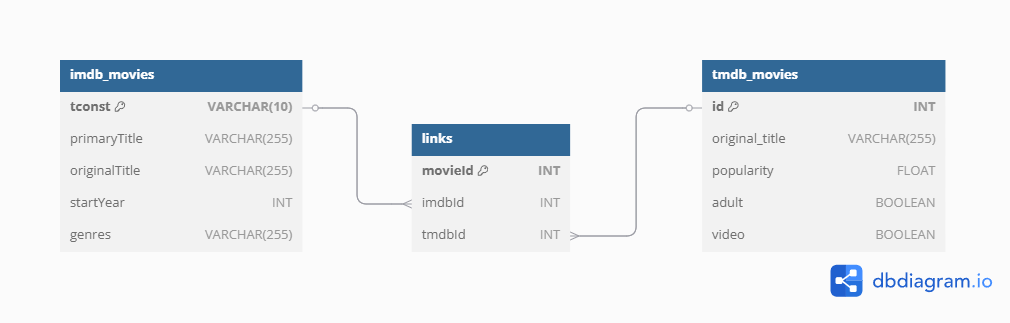

# 🎞️ MovieLens - data preparation

Загружаем архив с файлами в виде списка файлов. В случае работы в Google Collab нужно раскомментировать нужную строчку, а строчку над ней, наоборот, закомментировать

In [3]:
zip_path_local = r'G:\data\movielens.zip'
# zip_path_google = '/content/drive/MyDrive/MovieLens/movielens.zip'

with zipfile.ZipFile(zip_path_local, 'r') as z:
    file_list = z.namelist()
    print(file_list)

['ratings.csv', 'links.csv', 'movies.csv', 'tags.csv']


Присваиваем имена переменных, где каждой переменной соотвтествует одно собственное имя файла

In [4]:
ml_ratings = file_list[0]
ml_links = file_list[1]
ml_movies = file_list[2]
ml_tags = file_list[3]

По очереди открываем для предварительно просмотра

Рейтинги

In [5]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_ratings) as f:
        df_ratings = pd.read_csv(f)

df_ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


Связующая таблица, которая содержит идентификаторы фильмов в различных источниках

In [6]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_links) as f:
        df_links = pd.read_csv(f, dtype={'imdbId': str, 'tmdbId': str})

df_links.head()

,movieId,imdbId,tmdbId
0,1,0114709,862
1,2,0113497,8844
2,3,0113228,15602
3,4,0114885,31357
4,5,0113041,11862


Кинофильмы

In [7]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_movies) as f:
        df_movies = pd.read_csv(f)

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Пользовательские теги

In [8]:
with zipfile.ZipFile(zip_path_local, 'r') as z:
    with z.open(ml_tags) as f:
        df_tags = pd.read_csv(f)

df_tags.head()

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


# 🎞️ IMDb - data preparation

In [9]:
imdb_name = r'G:\data\name.basics.tsv.gz'
imdb_basic = r'G:\data\title.basics.tsv.gz'
imdb_akas = r'G:\data\title.akas.tsv.gz'
imdb_princip = r'G:\data\title.principals.tsv.gz'
imdb_ratings = r'G:\data\title.ratings.tsv.gz'
imdb_crew = r'G:\data\title.crew.tsv.gz'
imdb_episode = r'G:\data\title.episode.tsv.gz'

################# GOOGLE COLLAB #################
# imdb_name = '/content/drive/MyDrive/MovieLens/name.basics.tsv.gz'
# imdb_basic = '/content/drive/MyDrive/MovieLens/title.basics.tsv.gz'
# imdb_akas = '/content/drive/MyDrive/MovieLens/title.akas.tsv.gz'
# imdb_princip = '/content/drive/MyDrive/MovieLens/title.principals.tsv.gz'
# imdb_ratings = '/content/drive/MyDrive/MovieLens/title.ratings.tsv.gz'
# imdb_crew = '/content/drive/MyDrive/MovieLens/title.crew.tsv.gz'
# imdb_episode = '/content/drive/MyDrive/MovieLens/title.episode.tsv.gz'

In [10]:
with gzip.open(imdb_name, "rt", encoding="utf-8") as f:
    df_imdb_name = pd.read_csv(f, sep="\t") 

df_imdb_name.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [11]:
with gzip.open(imdb_basic, "rt", encoding="utf-8") as f:
    df_imdb_basic = pd.read_csv(f, sep="\t", low_memory=False) 

df_imdb_basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [12]:
with gzip.open(imdb_akas, "rt", encoding="utf-8") as f:
    df_imdb_akas = pd.read_csv(f, sep="\t") 

df_imdb_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0


In [13]:
with gzip.open(imdb_princip, "rt", encoding="utf-8") as f:
    df_imdb_princip = pd.read_csv(f, sep="\t") 

df_imdb_princip.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [14]:
with gzip.open(imdb_ratings, "rt", encoding="utf-8") as f:
    df_imdb_ratings = pd.read_csv(f, sep="\t") 

df_imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2130
1,tt0000002,5.6,289
2,tt0000003,6.4,2166
3,tt0000004,5.3,184
4,tt0000005,6.2,2892


In [15]:
with gzip.open(imdb_crew, "rt", encoding="utf-8") as f:
    df_imdb_crew = pd.read_csv(f, sep="\t") 

df_imdb_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [16]:
with gzip.open(imdb_episode, "rt", encoding="utf-8") as f:
    df_imdb_episode = pd.read_csv(f, sep="\t") 

df_imdb_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,\N,\N
1,tt0041951,tt0041038,1,9
2,tt0042816,tt0989125,1,17
3,tt0042889,tt0989125,\N,\N
4,tt0043426,tt0040051,3,42


# 🎞️ TMDB - data preparation

In [17]:
# tmdb_movie = r'G:\data\movie_ids_01_01_2025.json.gz'
# tmdb_series = r'G:\data\tv_series_ids_01_01_2025.json.gz'
# tmdb_person = r'G:\data\person_ids_01_01_2025.json.gz'
# tmdb_collect = r'G:\data\collection_ids_01_01_2025.json.gz'
# tmdb_network = r'G:\data\tv_network_ids_01_01_2025.json.gz'
# tmdb_keyword = r'G:\data\keyword_ids_01_01_2025.json.gz'
# tmdb_company = r'G:\data\production_company_ids_01_01_2025.json.gz'

# ################# GOOGLE COLLAB #################
# # tmdb_movie = '/content/drive/MyDrive/MovieLens/movie_ids_01_01_2025.json.gz'
# # tmdb_series = '/content/drive/MyDrive/MovieLens/tv_series_ids_01_01_2025.json.gz'
# # tmdb_person = '/content/drive/MyDrive/MovieLens/person_ids_01_01_2025.json.gz'
# # tmdb_collect = '/content/drive/MyDrive/MovieLens/collection_ids_01_01_2025.json.gz'
# # tmdb_network = '/content/drive/MyDrive/MovieLens/tv_network_ids_01_01_2025.json.gz'
# # tmdb_keyword = '/content/drive/MyDrive/MovieLens/keyword_ids_01_01_2025.json.gz'
# # tmdb_company = '/content/drive/MyDrive/MovieLens/production_company_ids_01_01_2025.json.gz'

In [18]:
# with gzip.open(tmdb_movie, "rt", encoding="utf-8") as f:
#     df_tmdb_movie = pd.read_json(f, lines=True)

# df_tmdb_movie.head()

In [19]:
# with gzip.open(tmdb_series, "rt", encoding="utf-8") as f:
#     df_tmdb_series = pd.read_json(f, lines=True)

# df_tmdb_series.head()

In [20]:
# with gzip.open(tmdb_person, "rt", encoding="utf-8") as f:
#     df_tmdb_person = pd.read_json(f, lines=True)

# df_tmdb_person.head()

In [21]:
# with gzip.open(tmdb_collect, "rt", encoding="utf-8") as f:
#     df_tmdb_collect = pd.read_json(f, lines=True)

# df_tmdb_collect.head()

In [22]:
# with gzip.open(tmdb_network, "rt", encoding="utf-8") as f:
#     df_tmdb_network = pd.read_json(f, lines=True)

# df_tmdb_network.head()

In [23]:
# df_tmdb_network[df_tmdb_network['name'].isin(['Netflix'])]

In [24]:
# with gzip.open(tmdb_keyword, "rt", encoding="utf-8") as f:
#     df_tmdb_keyword = pd.read_json(f, lines=True)

# df_tmdb_keyword.head()

In [25]:
# with gzip.open(tmdb_company, "rt", encoding="utf-8") as f:
#     df_tmdb_company = pd.read_json(f, lines=True)

# df_tmdb_company.head()

In [26]:
# df_tmdb_company[df_tmdb_company['name'].isin(['Netflix'])]

# 🧲 Попытка объединить согласно Диаграмме связей

In [54]:
tmdb_movie = pd.read_csv('TMDB_1996_2025.csv', sep=';', low_memory=False)
tmdb_movie.head()

,tmdb_id,name,overview,release_date,vote_average,vote_count,popularity,original_language,type,genres,production_companies,network_id,network_name
0,4232,Scream,"A year after the murder of her mother, a teena...",1996-12-20,7.400,7225,10.0240,en,movie,"Crime, Horror, Mystery","Dimension Films, Woods Entertainment",NaN,NaN
1,10830,Matilda,Matilda Wormwood is an exquisite and intellige...,1996-08-02,7.165,4502,8.8992,en,movie,"Comedy, Family, Fantasy","Jersey Films, TriStar Pictures",NaN,NaN
2,198038,Hannah,The dynamic PR-agent Hannah is starting up her...,1996-10-18,7.000,2,8.3326,de,movie,Thriller,"Epo-Film, Star*Film",NaN,NaN
3,664,Twister,An unprecedented series of violent tornadoes i...,1996-05-10,6.533,3534,9.1056,en,movie,"Action, Adventure, Drama","Warner Bros. Pictures, Universal Pictures, Amb...",NaN,NaN
4,954,Mission: Impossible,"When Ethan Hunt, the leader of a crack espiona...",1996-05-22,6.990,9077,10.0612,en,movie,"Adventure, Action, Thriller","Paramount Pictures, Cruise/Wagner Productions",NaN,NaN


Берем таблицу `links` из датасета `MovieLens`, создаем столбец `ttimdbId` добавляя двойное `tt` к `imdbId` так как в датасете `IMDb` идентификаторы в поле `tconst` выглядят следующим образом `tt114709`

In [86]:
links1 = pd.read_csv(r'G:\data\links1.csv', dtype='object')
links2 = pd.read_csv(r'G:\data\links2.csv', dtype='object')
links3 = pd.read_csv(r'G:\data\links3.csv', dtype='object')
links4 = pd.read_csv(r'G:\data\links4.csv', dtype='object')
links = pd.concat([links1, links2, links3, links4], axis=0)
links.drop_duplicates(subset='imdbId', inplace=True)
links.shape

(90592, 3)

In [87]:
links['ttimdbId'] = 'tt' + links['imdbId'].astype(str)
links.head()

,movieId,imdbId,tmdbId,ttimdbId
0,1,0114709,862,tt0114709
1,2,0113497,8844,tt0113497
2,3,0113228,15602,tt0113228
3,4,0114885,31357,tt0114885
4,5,0113041,11862,tt0113041


Количество строк в датасете `MovieLens`

In [89]:
links.shape[0]

90592

Теперь объединим с датасетом `IMDb`

In [90]:
merged_df = pd.merge(links, df_imdb_basic, left_on='ttimdbId', right_on='tconst', how='left')
merged_df

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,1,0114709,862,tt0114709,tt0114709,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy"
1,2,0113497,8844,tt0113497,tt0113497,movie,Jumanji,Jumanji,0,1995,\N,104,"Adventure,Comedy,Family"
2,3,0113228,15602,tt0113228,tt0113228,movie,Grumpier Old Men,Grumpier Old Men,0,1995,\N,101,"Comedy,Romance"
3,4,0114885,31357,tt0114885,tt0114885,movie,Waiting to Exhale,Waiting to Exhale,0,1995,\N,124,"Comedy,Drama,Romance"
4,5,0113041,11862,tt0113041,tt0113041,movie,Father of the Bride Part II,Father of the Bride Part II,0,1995,\N,106,"Comedy,Family,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90587,128856,1821384,322260,tt1821384,tt1821384,movie,Crockdale,Crockdale,0,2011,\N,76,Thriller
90588,128916,0132722,152797,tt0132722,tt0132722,short,Le bel indifférent,Le bel indifférent,0,1958,\N,29,Short
90589,129011,0195753,13590,tt0195753,tt0195753,video,Eddie Izzard: Glorious,Eddie Izzard: Glorious,0,1997,\N,99,"Comedy,Documentary"
90590,129393,1863280,125472,tt1863280,tt1863280,movie,In God We Teach,In God We Teach,0,2011,\N,62,Documentary


In [91]:
merged_df.isnull().sum()

movieId             0
imdbId              0
tmdbId            199
ttimdbId            0
tconst            212
titleType         212
primaryTitle      212
originalTitle     212
isAdult           212
startYear         212
endYear           212
runtimeMinutes    212
genres            212
dtype: int64

In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90592 entries, 0 to 90591
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movieId         90592 non-null  object
 1   imdbId          90592 non-null  object
 2   tmdbId          90393 non-null  object
 3   ttimdbId        90592 non-null  object
 4   tconst          90380 non-null  object
 5   titleType       90380 non-null  object
 6   primaryTitle    90380 non-null  object
 7   originalTitle   90380 non-null  object
 8   isAdult         90380 non-null  object
 9   startYear       90380 non-null  object
 10  endYear         90380 non-null  object
 11  runtimeMinutes  90380 non-null  object
 12  genres          90380 non-null  object
dtypes: object(13)
memory usage: 9.0+ MB


In [93]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358611 entries, 0 to 358610
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tmdb_id               358611 non-null  object 
 1   name                  358610 non-null  object 
 2   overview              291863 non-null  object 
 3   release_date          358610 non-null  object 
 4   vote_average          358611 non-null  float64
 5   vote_count            358611 non-null  int64  
 6   popularity            358611 non-null  float64
 7   original_language     358611 non-null  object 
 8   type                  358611 non-null  object 
 9   genres                295132 non-null  object 
 10  production_companies  200302 non-null  object 
 11  network_id            61195 non-null   float64
 12  network_name          61195 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 35.6+ MB


In [94]:
tmdb_movie['tmdb_id'] = tmdb_movie['tmdb_id'].astype(str)
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358611 entries, 0 to 358610
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tmdb_id               358611 non-null  object 
 1   name                  358610 non-null  object 
 2   overview              291863 non-null  object 
 3   release_date          358610 non-null  object 
 4   vote_average          358611 non-null  float64
 5   vote_count            358611 non-null  int64  
 6   popularity            358611 non-null  float64
 7   original_language     358611 non-null  object 
 8   type                  358611 non-null  object 
 9   genres                295132 non-null  object 
 10  production_companies  200302 non-null  object 
 11  network_id            61195 non-null   float64
 12  network_name          61195 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 35.6+ MB


In [95]:
merged_df[merged_df['tmdbId'].isin(tmdb_movie['tmdb_id'])]

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2,3,0113228,15602,tt0113228,tt0113228,movie,Grumpier Old Men,Grumpier Old Men,0,1995,\N,101,"Comedy,Romance"
7,8,0112302,45325,tt0112302,tt0112302,movie,Tom and Huck,Tom and Huck,0,1995,\N,97,"Adventure,Comedy,Drama"
11,12,0112896,12110,tt0112896,tt0112896,movie,Dracula: Dead and Loving It,Dracula: Dead and Loving It,0,1995,\N,88,"Comedy,Fantasy,Horror"
14,15,0112760,1408,tt0112760,tt0112760,movie,Cutthroat Island,Cutthroat Island,0,1995,\N,124,"Action,Adventure,Comedy"
17,18,0113101,5,tt0113101,tt0113101,movie,Four Rooms,Four Rooms,0,1995,\N,98,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90580,127284,0425295,37978,tt0425295,tt0425295,movie,Niagara Motel,Niagara Motel,0,2005,\N,88,Drama
90583,127569,0206988,217477,tt0206988,tt0206988,movie,One Way Boogie Woogie,One Way Boogie Woogie,0,1977,\N,60,Documentary
90584,128324,1539313,82649,tt1539313,tt1539313,video,Lunopolis,Lunopolis,0,2010,\N,98,Sci-Fi
90585,128844,0098962,30647,tt0098962,tt0098962,short,12:01 PM,12:01 PM,0,1990,\N,25,"Sci-Fi,Short,Thriller"


In [96]:
tmdb_movie[tmdb_movie['tmdb_id'].isin(['313783'])]

,tmdb_id,name,overview,release_date,vote_average,vote_count,popularity,original_language,type,genres,production_companies,network_id,network_name
156141,313783,That Day We Sang,TV Film adaptation of Victoria Wood's hit musi...,2014-12-26,6.8,5,0.3505,en,movie,"Drama, Music, TV Movie","Endor Productions, BBC",NaN,NaN


In [ ]:
# merged_df = pd.merge(merged_df, df_imdb_ratings, left_on='tconst', right_on='tconst', how='left')

# Кинопоиск

In [65]:
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
with engine.connect() as conn:
    kino = pd.read_sql_table('MOVIES_IMDB', conn, schema='public', dtype_backend='numpy_nullable')

# csv_file = r'C:\Users\admin\Downloads\kinopoisk_movies.csv'
# kino = pd.read_csv(csv_file, sep=';', low_memory=False)
kino.head()

,status,movieLength,id,type,name,year,genres,countries,typeNumber,enName,...,votes.await,premiere.world,premiere.russia,premiere.bluray,premiere.dvd,premiere.cinema,premiere.digital,budget.value,budget.currency,audience
0,<NA>,100.0,724673,movie,Бой Корбетта и Фитцсиммонса,1897,"документальный, новости, спорт",США,1,<NA>,...,0,1897-05-22,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]
1,<NA>,1.0,47058,movie,Итальянский крестьянский танец,1895,"документальный, короткометражка",Германия,1,<NA>,...,0,1895-11-01,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]
2,<NA>,1.0,470115,movie,Серпантин,1895,короткометражка,Германия,1,<NA>,...,0,1895-11-01,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]
3,<NA>,1.0,499949,movie,Китайский опиумный притон,1894,короткометражка,США,1,<NA>,...,0,1894-10-01,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]
4,<NA>,45.0,499948,movie,Мисс Джерри,1894,"мелодрама, короткометражка",США,1,<NA>,...,0,1894-10-09,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]


In [66]:
kino.shape[0]

169528

In [67]:
kino.columns

Index(['status', 'movieLength', 'id', 'type', 'name', 'year', 'genres',
       'countries', 'typeNumber', 'enName', 'ageRating', 'ratingMpaa',
       'updatedAt', 'createdAt', 'shortDescription', 'ticketsOnSale', 'top10',
       'top250', 'releaseYears', 'deletedAt', 'isSeries', 'seriesLength',
       'totalSeriesLength', 'networks', 'isTmdbChecked', 'fees.world.value',
       'fees.world.currency', 'fees.russia.value', 'fees.russia.currency',
       'fees.usa.value', 'fees.usa.currency', 'externalId.imdb',
       'externalId.tmdb', 'externalId.kpHD', 'rating.kp', 'rating.imdb',
       'rating.filmCritics', 'rating.russianFilmCritics', 'rating.await',
       'votes.kp', 'votes.imdb', 'votes.filmCritics',
       'votes.russianFilmCritics', 'votes.await', 'premiere.world',
       'premiere.russia', 'premiere.bluray', 'premiere.dvd', 'premiere.cinema',
       'premiere.digital', 'budget.value', 'budget.currency', 'audience'],
      dtype='object')

In [68]:
kino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169528 entries, 0 to 169527
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   status                     18 non-null      string        
 1   movieLength                169528 non-null  Float64       
 2   id                         169528 non-null  Int64         
 3   type                       169528 non-null  string        
 4   name                       169528 non-null  string        
 5   year                       169514 non-null  Int64         
 6   genres                     169528 non-null  string        
 7   countries                  169528 non-null  string        
 8   typeNumber                 169528 non-null  Int64         
 9   enName                     11 non-null      string        
 10  ageRating                  47818 non-null   Int64         
 11  ratingMpaa                 29092 non-null   string  

In [97]:
kino[kino['externalId.imdb'].isin(merged_df['ttimdbId'])]

,status,movieLength,id,type,name,year,genres,countries,typeNumber,enName,...,votes.await,premiere.world,premiere.russia,premiere.bluray,premiere.dvd,premiere.cinema,premiere.digital,budget.value,budget.currency,audience
5,<NA>,1.0,215398,movie,Корбетт и Кортни перед кинематографом,1894,"короткометражка, спорт",США,1,<NA>,...,0,1894-11-17,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]
6,<NA>,1.0,214381,movie,"Чих, записанный на кинетоскоп Эдисона",1894,"документальный, короткометражка",США,1,<NA>,...,0,1894-01-09,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,[]
26,<NA>,3.0,185289,movie,Замок дьявола,1896,"короткометражка, ужасы",Франция,1,<NA>,...,0,1896-12-24,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
31,<NA>,1.0,266514,movie,Кузнецы,1895,"документальный, короткометражка",Франция,1,<NA>,...,0,1895-12-28,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
33,<NA>,1.0,266523,movie,Площадь Корделье в Лионе,1895,"документальный, короткометражка",Франция,1,<NA>,...,0,1895-12-28,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169518,<NA>,95.0,1246571,movie,Агент Лев,2020,комедия,"Франция, Бельгия",1,<NA>,...,0,2020-01-14,2020-08-06,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
169520,<NA>,103.0,1246629,movie,Побег из брака,2020,"драма, комедия",Нидерланды,1,<NA>,...,0,2020-02-13,NaT,NaT,NaT,NaT,2022-04-11,<NA>,<NA>,<NA>
169522,<NA>,96.0,1251286,movie,Слепые амбиции,2021,документальный,Австралия,1,<NA>,...,0,2021-06-10,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
169526,<NA>,84.0,1302985,movie,Талант шершня,2020,триллер,"Италия, Испания",1,<NA>,...,0,2020-11-18,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>


In [69]:
kino['externalId.tmdb'] = kino['externalId.tmdb'].astype(str)

In [53]:
with engine.connect() as conn:
    actors = pd.read_sql_table('ACTORS_IMDB', conn, schema='public', dtype_backend='numpy_nullable')
actors.head()

,movie_id,actor_id,actor_name,actor_en_name,role,profession
0,724673,215131,Джеймс Дж. Корбетт,James J. Corbett,<NA>,актеры
1,724673,3027886,Боб Фицсиммонс,Bob Fitzsimmons,<NA>,актеры
2,724673,3027887,Билли Мэдден,Billy Madden,<NA>,актеры
3,724673,3027888,Джордж Сайлер,George Siler,<NA>,актеры
4,724673,1127798,Джон Л. Салливан,John L. Sullivan,<NA>,актеры


In [41]:
kino.columns

Index(['status', 'movieLength', 'id', 'type', 'name', 'year', 'genres',
       'countries', 'typeNumber', 'enName', 'ageRating', 'ratingMpaa',
       'updatedAt', 'createdAt', 'shortDescription', 'ticketsOnSale', 'top10',
       'top250', 'releaseYears', 'deletedAt', 'isSeries', 'seriesLength',
       'totalSeriesLength', 'networks', 'isTmdbChecked', 'fees.world.value',
       'fees.world.currency', 'fees.russia.value', 'fees.russia.currency',
       'fees.usa.value', 'fees.usa.currency', 'externalId.imdb',
       'externalId.tmdb', 'externalId.kpHD', 'rating.kp', 'rating.imdb',
       'rating.filmCritics', 'rating.russianFilmCritics', 'rating.await',
       'votes.kp', 'votes.imdb', 'votes.filmCritics',
       'votes.russianFilmCritics', 'votes.await', 'premiere.world',
       'premiere.russia', 'premiere.bluray', 'premiere.dvd', 'premiere.cinema',
       'premiere.digital', 'budget.value', 'budget.currency', 'audience'],
      dtype='object')

In [42]:
kinodata = pd.merge(merged_df_all, kino, left_on='tconst', right_on='externalId.imdb', how='left', indicator=True)
kinodata

,movieId,imdbId,tmdbId,ttimdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,...,premiere.world,premiere.russia,premiere.bluray,premiere.dvd,premiere.cinema,premiere.digital,budget.value,budget.currency,audience,_merge
0,1,0114709,862,tt0114709,tt0114709,movie,Toy Story,Toy Story,0,1995,...,1995-11-19,NaT,2011-11-15,2010-06-01,NaT,NaT,30000000.0,$,"[{""count"": 43868300, ""country"": ""США""}, {""coun...",both
1,2,0113497,8844,tt0113497,tt0113497,movie,Jumanji,Jumanji,0,1995,...,1995-12-15,1996-03-06,NaT,1997-05-14,NaT,2012-12-04,65000000.0,$,"[{""count"": 22876600, ""country"": ""США""}, {""coun...",both
2,3,0113228,15602,tt0113228,tt0113228,movie,Grumpier Old Men,Grumpier Old Men,0,1995,...,1995-12-22,NaT,NaT,NaT,NaT,NaT,25000000.0,$,"[{""count"": 16238300, ""country"": ""США""}, {""coun...",both
3,4,0114885,31357,tt0114885,tt0114885,movie,Waiting to Exhale,Waiting to Exhale,0,1995,...,1995-12-22,NaT,NaT,2010-05-20,NaT,NaT,16000000.0,$,"[{""count"": 15252900, ""country"": ""США""}, {""coun...",both
4,5,0113041,11862,tt0113041,tt0113041,movie,Father of the Bride Part II,Father of the Bride Part II,0,1995,...,1995-12-08,NaT,NaT,NaT,NaT,NaT,30000000.0,$,"[{""count"": 17474200, ""country"": ""США""}, {""coun...",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87520,292731,26812510,1032473,tt26812510,tt26812510,movie,El caso Monroy,El caso Monroy,0,2022,...,NaT,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>,left_only
87521,292737,14907358,986674,tt14907358,tt14907358,movie,Shelter in Solitude,Shelter in Solitude,0,2023,...,2023-10-06,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>,both
87522,292753,12388280,948139,tt12388280,tt12388280,movie,Orca,Orca,0,2021,...,NaT,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>,left_only
87523,292755,0064027,182776,tt0064027,tt0064027,movie,The Angry Breed,The Angry Breed,0,1968,...,NaT,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>,both


In [43]:
kinodata = kinodata[kinodata['_merge'] == 'both']
kinodata.shape[0]

67100

In [44]:
kinodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67100 entries, 0 to 87524
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   movieId                    67100 non-null  int64         
 1   imdbId                     67100 non-null  object        
 2   tmdbId                     67100 non-null  object        
 3   ttimdbId                   67100 non-null  object        
 4   tconst                     67100 non-null  object        
 5   titleType                  67100 non-null  object        
 6   primaryTitle               67100 non-null  object        
 7   originalTitle              67100 non-null  object        
 8   isAdult                    67100 non-null  object        
 9   startYear                  67100 non-null  object        
 10  endYear                    67100 non-null  object        
 11  runtimeMinutes             67100 non-null  object        
 12  genres_x 

In [45]:
kinodata.columns

Index(['movieId', 'imdbId', 'tmdbId', 'ttimdbId', 'tconst', 'titleType',
       'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'merge_1', 'adult', 'id_x',
       'original_title', 'popularity', 'video', 'merge_2', 'status',
       'movieLength', 'id_y', 'type', 'name', 'year', 'genres_y', 'countries',
       'typeNumber', 'enName', 'ageRating', 'ratingMpaa', 'updatedAt',
       'createdAt', 'shortDescription', 'ticketsOnSale', 'top10', 'top250',
       'releaseYears', 'deletedAt', 'isSeries', 'seriesLength',
       'totalSeriesLength', 'networks', 'isTmdbChecked', 'fees.world.value',
       'fees.world.currency', 'fees.russia.value', 'fees.russia.currency',
       'fees.usa.value', 'fees.usa.currency', 'externalId.imdb',
       'externalId.tmdb', 'externalId.kpHD', 'rating.kp', 'rating.imdb',
       'rating.filmCritics', 'rating.russianFilmCritics', 'rating.await',
       'votes.kp', 'votes.imdb', 'votes.filmCritics',
       'vo

In [46]:
kinodata.drop(['merge_1', 'merge_2', '_merge', 'status', 'imdbId', 'ttimdbId', 'deletedAt', 'isSeries', 'seriesLength',
       'totalSeriesLength', 'networks', 'isTmdbChecked', 'externalId.imdb', 'externalId.tmdb', 'externalId.kpHD', 'enName',], axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_32524\11103670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kinodata.drop(['merge_1', 'merge_2', '_merge', 'status', 'imdbId', 'ttimdbId', 'deletedAt', 'isSeries', 'seriesLength',


In [47]:
kinodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67100 entries, 0 to 87524
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   movieId                    67100 non-null  int64         
 1   tmdbId                     67100 non-null  object        
 2   tconst                     67100 non-null  object        
 3   titleType                  67100 non-null  object        
 4   primaryTitle               67100 non-null  object        
 5   originalTitle              67100 non-null  object        
 6   isAdult                    67100 non-null  object        
 7   startYear                  67100 non-null  object        
 8   endYear                    67100 non-null  object        
 9   runtimeMinutes             67100 non-null  object        
 10  genres_x                   67100 non-null  object        
 11  adult                      66851 non-null  object        
 12  id_x     

In [48]:
kinodata.columns

Index(['movieId', 'tmdbId', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres_x', 'adult', 'id_x', 'original_title', 'popularity', 'video',
       'movieLength', 'id_y', 'type', 'name', 'year', 'genres_y', 'countries',
       'typeNumber', 'ageRating', 'ratingMpaa', 'updatedAt', 'createdAt',
       'shortDescription', 'ticketsOnSale', 'top10', 'top250', 'releaseYears',
       'fees.world.value', 'fees.world.currency', 'fees.russia.value',
       'fees.russia.currency', 'fees.usa.value', 'fees.usa.currency',
       'rating.kp', 'rating.imdb', 'rating.filmCritics',
       'rating.russianFilmCritics', 'rating.await', 'votes.kp', 'votes.imdb',
       'votes.filmCritics', 'votes.russianFilmCritics', 'votes.await',
       'premiere.world', 'premiere.russia', 'premiere.bluray', 'premiere.dvd',
       'premiere.cinema', 'premiere.digital', 'budget.value',
       'budget.currency', 'audience'],
      dtype='object'

In [49]:
print(kinodata['year'].min())
print(kinodata['year'].max())

1874
2024


In [50]:
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
with engine.connect() as conn:
    res_pos = pd.read_sql_table('kinopoisk_res_pos', conn, schema='public', dtype_backend='numpy_nullable')

res_pos.head()

,movie_id,res_id,content,rating_res,class_res
0,1012421,53,Каждый в универе мечтал попасть на её день рож...,pos,8.0
1,1012421,54,Студентка колледжа Три Гембман просыпается в о...,pos,8.0
2,1012421,55,Вот только недавно в рецензии на 'Коматозников...,pos,7.0
3,1012421,56,"Маленький бюджет, неоригинальный сюжет, не сам...",pos,<NA>
4,1012421,59,"В меру симпатичная, но не в меру потаскушечная...",pos,7.0


In [51]:
kinodata[kinodata['id_y'].isin(res_pos['movie_id'])]

,movieId,tmdbId,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,votes.await,premiere.world,premiere.russia,premiere.bluray,premiere.dvd,premiere.cinema,premiere.digital,budget.value,budget.currency,audience
3,4,31357,tt0114885,movie,Waiting to Exhale,Waiting to Exhale,0,1995,\N,124,...,0,1995-12-22,NaT,NaT,2010-05-20,NaT,NaT,16000000.0,$,"[{""count"": 15252900, ""country"": ""США""}, {""coun..."
4,5,11862,tt0113041,movie,Father of the Bride Part II,Father of the Bride Part II,0,1995,\N,106,...,0,1995-12-08,NaT,NaT,NaT,NaT,NaT,30000000.0,$,"[{""count"": 17474200, ""country"": ""США""}, {""coun..."
7,8,45325,tt0112302,movie,Tom and Huck,Tom and Huck,0,1995,\N,97,...,0,1995-12-22,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,"[{""count"": 5440200, ""country"": ""США""}]"
9,10,710,tt0113189,movie,GoldenEye,GoldenEye,0,1995,\N,130,...,0,1995-11-13,1996-01-19,NaT,NaT,NaT,NaT,80000000.0,$,"[{""count"": 24403900, ""country"": ""США""}, {""coun..."
12,13,21032,tt0112453,movie,Balto,Balto,0,1995,\N,78,...,0,1995-12-22,NaT,NaT,2003-11-13,NaT,NaT,<NA>,<NA>,"[{""count"": 2580400, ""country"": ""США""}, {""count..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87169,291108,56444,tt1475549,movie,The Dogfather,The Dogfather,0,2010,\N,89,...,0,2010-03-12,NaT,NaT,2011-06-02,NaT,NaT,<NA>,<NA>,<NA>
87245,291264,26150,tt1296068,movie,Champions,Duo biao,0,2008,\N,118,...,0,2008-11-13,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
87416,291883,219580,tt0061997,short,The Mouse from H.U.N.G.E.R.,The Mouse from H.U.N.G.E.R.,0,1967,\N,7,...,0,1967-04-21,NaT,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
87423,291899,600442,tt11449918,movie,V.I.P. Cop New Year's Eve Mayhem 2,Politseyskiy s Rublyovki. Novogodniy bespredel 2,0,2019,\N,85,...,0,2019-12-13,2019-12-12,NaT,NaT,NaT,NaT,<NA>,<NA>,<NA>
